In [ ]:
%pip install xarray pathlib numpy matplotlib scipy

### Utility functions

Run the cell below, but feel free to ignore this code — it’s some utility functions we’ll use later for convenience.

In [1]:
import matplotlib.pyplot as plt

def style_plot(title, xlabel, ylabel):
    '''
    Styles plots displaying filters. Adds labels, grids and shows legends

    Args:
        title: title of plot
        xlabel: label x-axis
        ylabel: label y-axis
    '''
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.margins(0, 0.1)
    plt.grid(which='both', axis='both')
    plt.legend();

class utils:
    style_plot = style_plot

# Introduction

In this notebook, you will get practice creating your own toy signals, learn how to construct and plot different kinds of filters, and study the effects of those filters by applying them to toy signals.

## Section 1

### Generate Periodic signals

It's often useful to construct toy signals when doing signal analysis. Toy signals allow you to test the tools to make sure that you are using them correctly and to understand how they work. This section provides a hands-on introduction to creating and visualizing toy signals using the `scipy.signal` module. 

| Code                             | Description                                                                                   |
|----------------------------------|-----------------------------------------------------------------------------------------------|
| `np.pi`                          | The mathematical constant π.                                   |
| `np.linspace(start, stop, n)`    | Generates an array of `n` evenly spaced values from `start` to `stop`.                        |
| `np.arange(start, stop, step_size)`   | Generates an array of values evenly spaced from `start` to `stop`, with the spacing given by `step_size` |                           |
| `np.sin(2*np.pi*f*time_vec + phase)`         | Generates a sine wave oscillating with a frequency `f` over a time period `time_vec` (a vector of time points) |
| `signal.chirp(time_vec, f0, f1, t1)` | Generates a chirp signal, which is a signal where the frequency changes over time. |
| `plt.plot(x, y)`                 | Plots the data in `y` against the corresponding values in `x`.                                |

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

**Example**: Generate and plot a sinusoid signal lasting 1 second with a frequency of 5 Hz.

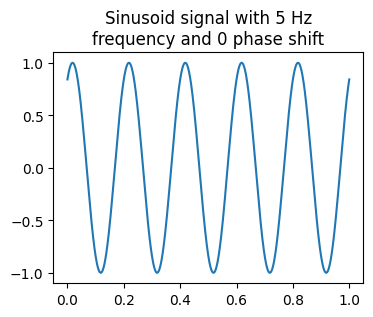

In [4]:
# Generate signal
time_vec = np.linspace(0,1,1000) # seconds
frequency = 5 # Hz
phase = 1
sig = np.sin(2*np.pi*frequency*time_vec+phase)

plt.figure(figsize=(4,3))
plt.plot(time_vec,sig)
plt.title(f'Sinusoid signal with {frequency} Hz\nfrequency and 0 phase shift');

**Exercise**: Generate and plot a sinusoid signal lasting 1 second with a frequency of 5 Hz and a phase of $\pi/2$.

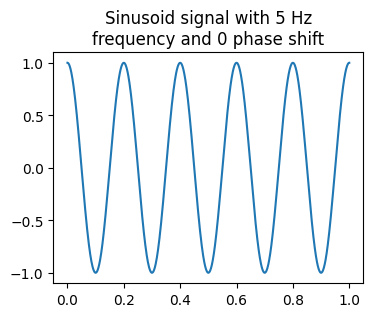

In [7]:
# Solution
time_vec = np.linspace(0,1,1000) # seconds
frequency = 5 # Hz
phase = np.pi/2
sig = np.sin(2*np.pi*frequency*time_vec+phase)

plt.figure(figsize=(4,3))
plt.plot(time_vec,sig)
plt.title(f'Sinusoid signal with {frequency} Hz\nfrequency and 0 phase shift');

**Exercise**: Generate and plot a sinusoid signal lasting 1 second with a frequency of 20 Hz and a phase of 0.

In [14]:
# Solution


**Example**: Generate and plot a chirp signal that starts at a frequency of 1 Hz and increases to 10 Hz over a period of 1 second.

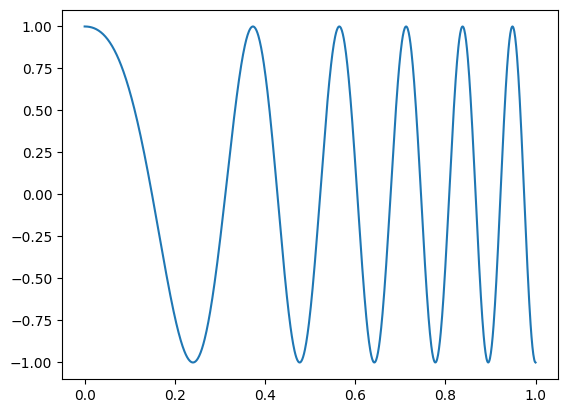

In [11]:
duration = 1 # second
sampling_frequency = 1000
time_vec = np.linspace(0,duration,int(sampling_frequency*duration)) # seconds

sig = signal.chirp(time_vec, f0=1, f1=10, t1=1)
plt.plot(time_vec, sig)

**Exercise**: Generate and plot a chirp signal that starts at a frequency of 5 Hz and increases to a frequency of 15 Hz over a period of 1 second.

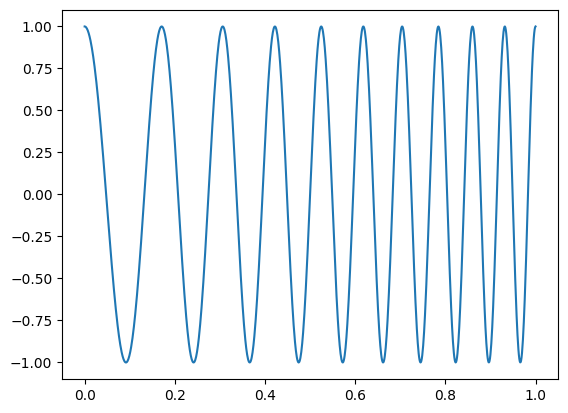

In [12]:
# Solution
duration = 1 # second
sampling_frequency = 1000
time_vec = np.linspace(0,duration,int(sampling_frequency*duration)) # seconds

sig = signal.chirp(time_vec, f0=5, f1=15, t1=1)
plt.plot(time_vec, sig)

**Exercise**: Generate and plot a chirp signal that *starts* at a frequency of 20 Hz and **decreases** to a frequency of 2 Hz over a period of 3 seconds.

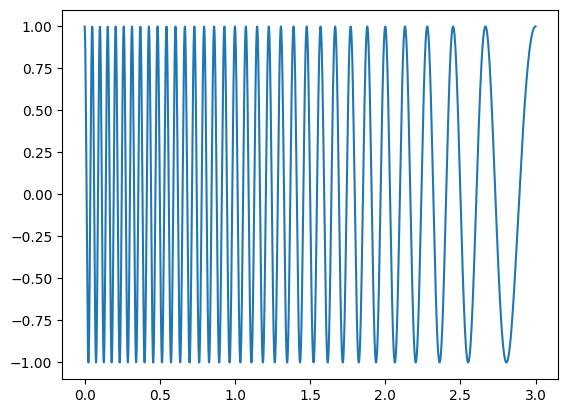

In [14]:
# Solution
duration = 3 # second
sampling_frequency = 1000
time_vec = np.linspace(0,duration,int(sampling_frequency*duration)) # seconds

sig = signal.chirp(time_vec, f0=20, f1=2, t1=3)
plt.plot(time_vec, sig)

**Example**: Generate and plot a composite signal that is a sum of a chirp signal that starts at a frequency of 1 Hz and increases to 10 Hz over a duration of 1 second and a sine wave with frequency of 5 Hz and phase 0.

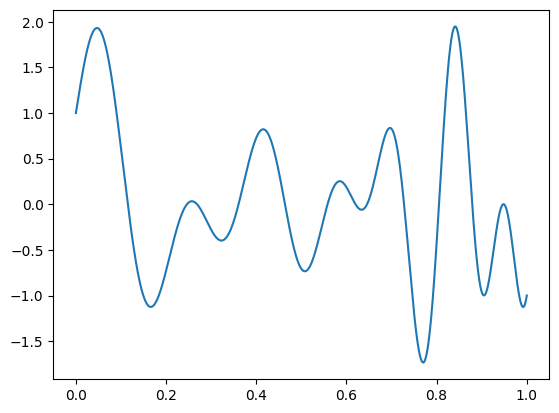

In [15]:
# Generate signal
duration = 1
sampling_frequency = 1000
time_vec = np.linspace(0,duration,sampling_frequency) # seconds
frequency = 5 # Hz
phase = 0
sine_signal = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=1, f1=10, t1=1)

composite_signal = sine_signal + chirp_signal
plt.plot(time_vec, composite_signal)

**Exercise**: Generate and plot a composite signal that is a sum of a chirp signal that starts at a frequency of 2 Hz and increases to 20 Hz over a duration of 1 second and a sine wave with frequency of 5 Hz and phase $\pi/2$.

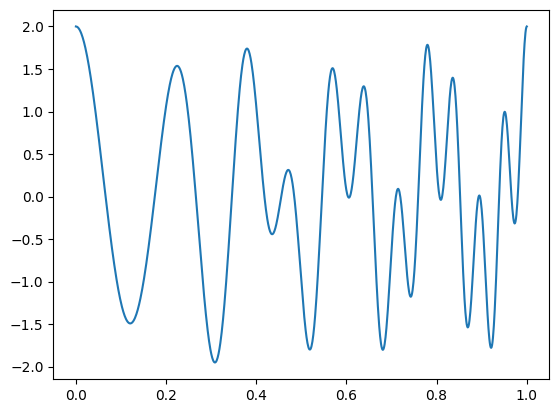

In [16]:
# solution
duration = 1
sampling_frequency = 1000
time_vec = np.linspace(0,duration,sampling_frequency) # seconds
frequency = 5 # Hz
phase = np.pi/2
sine_signal = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=2, f1=20, t1=1)

composite_signal = sine_signal + chirp_signal
plt.plot(time_vec, composite_signal)


**Exercise**: Generate and plot a composite signal that is a sum of a chirp signal that starts at a frequency of 15 Hz and *decreases* to 5 Hz over a duration of 1 second and a sine wave with frequency of 10 Hz and phase 0.

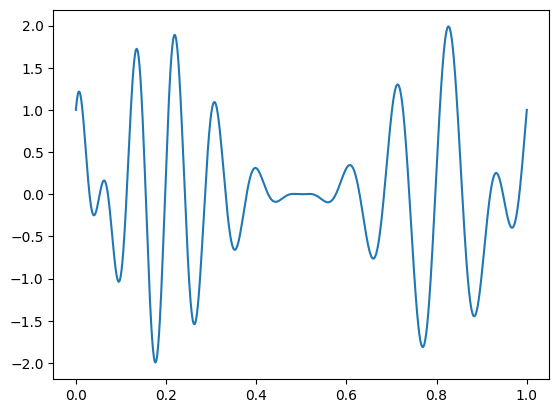

In [17]:
# solution
duration = 1
sampling_frequency = 1000
time_vec = np.linspace(0,duration,sampling_frequency) # seconds
frequency = 10 # Hz
phase = 0
sine_signal = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=15, f1=5, t1=1)

composite_signal = sine_signal + chirp_signal
plt.plot(time_vec, composite_signal)

## Section 2

### Constructing and and applying lowpass filters to signals

The LFP is defined as the low-frequency part of the recorded extracellular potential (ECP). That means that to obtain the LFP, you need to filter the extracellular potential for the low frequencies (below a few hundred Hz). That's done by applying a low-pass filter to the recorded signal. There are other kinds of filters that can be constructed to extract or remove content from other frequency ranges. A list with an illustration of the main types of filters is given below. Common to all of the filter types is that they remove the content in certain frequency ranges from the signal and retain the content in other frequency ranges.

- **Lowpass** filters - keep part of signal **below** a certain frequency.
- **Highpass** filters - keep part of signal **above** a certain frequency.
- **Bandpass** filters - keep part of signal **inside** a certain frequency range.
- **Bandstop** filters - keep part of signal **outside** a certain frequency range.

<br>
<img src="Resources/filter_types_marked.png" alt="Filter types" width="60%" height="30%">


Credit: [allaboutcircuits.com](https://www.allaboutcircuits.com/technical-articles/low-pass-filter-tutorial-basics-passive-RC-filter/)

| Code | Description |
| :-- | :-- |
| `b, a = signal.butter(filter_order, cutoff_frequency, btype = 'lowpass', fs = sampling_frequency)`| Create the coefficients `b` and `a` to be used in the filtering of the signal. The filter type can be changed with the `btype` parameter.|
| `filtered_signal = signal.filtfilt(b, a, signal))`| Apply the constructed filter to the signal using the coefficients `b` and `a`.|
| `w, h = signal.freqz(b, a, fs=sampling_frequency)`| Computes the frequency response of the filter with coefficients `b` and `a`. `h` is the frequency response (the filter's magnitude at a given frequency), `w` is the frequencies at which the response is calculated.|
| `h_real = np.abs(h)` | Get the real part (the amplitude) of the frequency response. |
| `plt.plot(x, y)` | Plot y values against x values. |
| `utils.style_plot(title='some_title',`<br> &nbsp;&nbsp;&nbsp;&nbsp;`xlabel = 'some_xlabel [unit]',`<br> &nbsp;&nbsp;&nbsp;&nbsp;`ylabel='some_ylabel [unit]')` | Function to style plots of filters. |

**Example**: Construct and plot a low-pass butterworth filter with a cut-off frequency at 100 Hz.

In [22]:
filter_order = 10
cutoff_frequency = 100 # Hz
sampling_frequency = 1250 # Hz

# creating butter filter
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

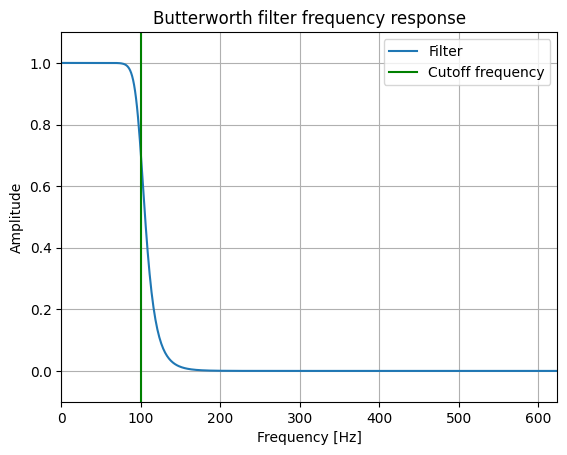

In [23]:
h_real = np.abs(h)
plt.plot(w, h_real, label='Filter')
plt.axvline(cutoff_frequency, color='green', label='Cutoff frequency')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and plot a low-pass butterworth filter with a cut-off frequency at 300 Hz.


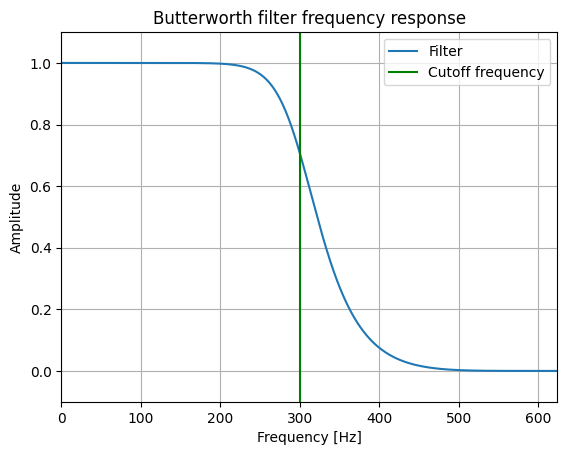

In [29]:
# solution
filter_order = 5
cutoff_frequency = 300 # Hz
sampling_frequency = 1250 # Hz

# creating butter filter
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

h_real = np.abs(h)
plt.plot(w, h_real, label='Filter')
plt.axvline(cutoff_frequency, color='green', label='Cutoff frequency')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and plot the same low-pass butterworth filter with a cutoff frequency at 300 Hz, but change the `filter_order` parameter to 2. 

Compare the filter response to the filter above with filter order equal to 5: What happens to the filter response around the cutoff frequency?

In [ ]:
# solution
filter_order = 2
cutoff_frequency = 300 # Hz
sampling_frequency = 1250 # Hz

# creating butter filter
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

h_real = np.abs(h)
plt.plot(w, h_real, label='Filter')
plt.axvline(cutoff_frequency, color='green', label='Cutoff frequency')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and plot a low-pass butterworth filter with a cutoff frequency at 300 Hz and a filter order of 5. This time set the ``sampling_frequency`` to 500 Hz. 

What error do you get? What do you have to (at least) change the sampling frequency to to not get this error anymore?

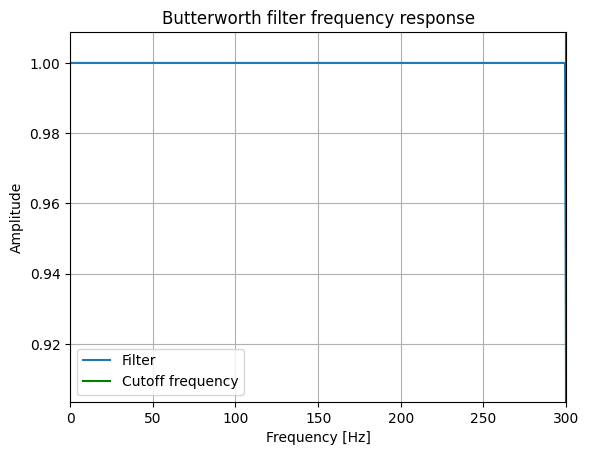

In [32]:
# Solution
# solution
filter_order = 5
cutoff_frequency = 300 # Hz
sampling_frequency = 601 # Hz

# creating butter filter
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

h_real = np.abs(h)
plt.plot(w, h_real, label='Filter')
plt.axvline(cutoff_frequency, color='green', label='Cutoff frequency')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Example**: Apply a lowpass filter with a cutoff frequency at 10 Hz to the sine wave generated below oscillating with a frequency of 5 Hz. (This could imitate the LFP from a single channel in a recording.) Plot the original signal together with the filtered signal.

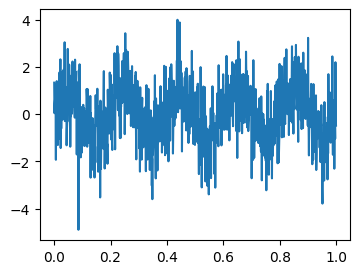

In [33]:
# provided

# Generate signal with noise
sampling_frequency = 1000 # Hz
duration = 1 # seconds
time_vec = np.linspace(0,duration,sampling_frequency*duration) # seconds
frequency = 5 # Hz
noise = np.random.normal(0,1,len(time_vec))
sig = np.sin(2*np.pi*frequency*time_vec)+noise

plt.figure(figsize=(4,3))
plt.plot(time_vec, sig);

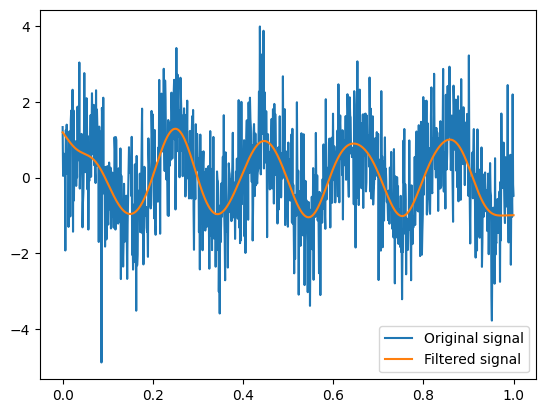

In [34]:
# solution

filter_order = 5 #
cutoff_frequency = 10 # Hz

# creating butter filter
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)

filtered_signal = signal.filtfilt(b, a, sig)

plt.plot(time_vec, sig, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()

**Exercise**: Apply a lowpass filter with a cutoff frequency at 10 Hz to the chirp signal below that starts at 2 Hz and stops at 20 Hz. Plot the original signal together with the filtered signal.

What happens to the higher frequencies in the chirp signal? 

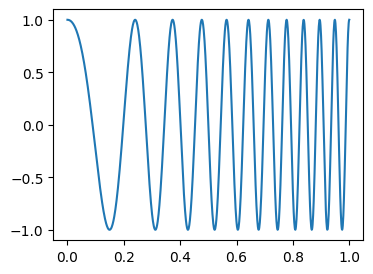

In [35]:
# provided

# generate signal
sampling_frequency = 1000
duration = 1
time_vec = np.linspace(0,duration,sampling_frequency*duration) # seconds
chirp_sig = signal.chirp(time_vec, f0=2, f1=20, t1=1)

plt.figure(figsize=(4,3))
plt.plot(time_vec, chirp_sig);

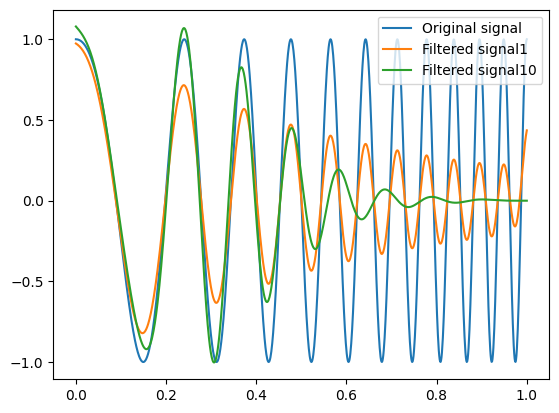

In [42]:
# Solution
filter_order = 1 #
cutoff_frequency = 10 # Hz
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)
filtered_signal1 = signal.filtfilt(b, a, chirp_sig)

filter_order = 10 #
cutoff_frequency = 10 # Hz
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'low', fs = sampling_frequency)
filtered_signal10 = signal.filtfilt(b, a, chirp_sig)

plt.plot(time_vec, chirp_sig, label = 'Original signal')
plt.plot(time_vec, filtered_signal1, label = 'Filtered signal1')
plt.plot(time_vec, filtered_signal10, label = 'Filtered signal10')
plt.legend()

**Exercise**: Apply a **highpass** filter with a cutoff frequency at 10 Hz to the same chirp signal. Plot the original signal together with the filtered signal. *Hint*: Change the `btype` parameter in the `signal.butter` function to create a highpass filter.

What happens to the lower frequencies in the chirp signal? 

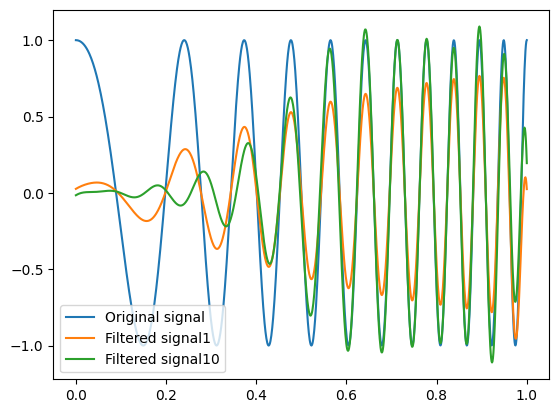

In [43]:
# Solution
filter_order = 1 #
cutoff_frequency = 10 # Hz
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'high', fs = sampling_frequency)
filtered_signal1 = signal.filtfilt(b, a, chirp_sig)

filter_order = 10 #
cutoff_frequency = 10 # Hz
b, a = signal.butter(filter_order, cutoff_frequency, btype = 'high', fs = sampling_frequency)
filtered_signal10 = signal.filtfilt(b, a, chirp_sig)

plt.plot(time_vec, chirp_sig, label = 'Original signal')
plt.plot(time_vec, filtered_signal1, label = 'Filtered signal1')
plt.plot(time_vec, filtered_signal10, label = 'Filtered signal10')
plt.legend()

## Section 3

### Construct and apply bandpass filters to a signal

| Code | Description |
| :-- | :-- |
| `b, a = ss.butter(filter_order, cutoff_frequency, btype = 'bandpass', fs = sampling_frequency)`| Create the coefficients `b` and `a` to be used in the ``bandpass`` filtering of the signal.
| `filtered_signal = ss.filtfilt(b, a, signal))`| Apply the constructed filter to the signal using the coefficients `b` and `a`.|
| `w, h = ss.freqz(b, a, fs=sampling_frequency)`| Compute the frequency response of the filter with coefficients `b` and `a`. `h` is the frequency response (the filter's magnitude at a given frequency), `w` is the frequencies at which the response is calculated.|
| `h_real = np.abs(h)` | Get the real part (the amplitude) of the frequency response. |
| `plt.plot(x, y)`                 | Plots the data in `y` against the corresponding values in `x`.                                |

**Example**: Construct and plot a bandpass butterworth filter with a low cutoff at 250 Hz and a high cutoff at 500 Hz.

In [44]:
filter_order = 5
sampling_frequency = 1250 # Hz
lowcut = 250 # Hz
highcut = 500 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'band', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

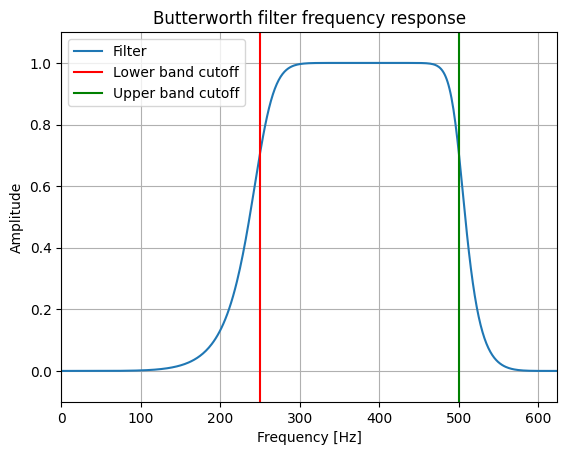

In [45]:
plt.plot(w, np.abs(h), label='Filter')
plt.axvline(lowcut, color='red', label='Lower band cutoff')
plt.axvline(highcut, color='green', label='Upper band cutoff')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and plot a bandpass butterworth filter with a low cutoff at 30 Hz and a high cutoff at 120 Hz.

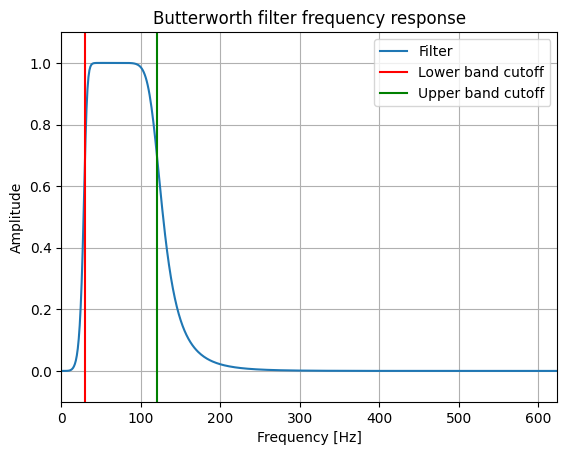

In [46]:
# solution
filter_order = 5
sampling_frequency = 1250 # Hz
lowcut = 30 # Hz
highcut = 120 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'band', fs = sampling_frequency)

# Calculate the frequency response for these filter coefficients b and a
w, h = signal.freqz(b, a, fs=sampling_frequency)

plt.plot(w, np.abs(h), label='Filter')
plt.axvline(lowcut, color='red', label='Lower band cutoff')
plt.axvline(highcut, color='green', label='Upper band cutoff')

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Apply a bandpass filter a low cutoff at 20 Hz and a high cutoff at 120 Hz to the composite signal generated below consisting of a chirp signal and a sine wave oscillating at 30 Hz. Plot the original signal together with the filtered signal.

What part of the composite signal remains after applying the filter?

Text(0.5, 1.0, 'Composite signal')

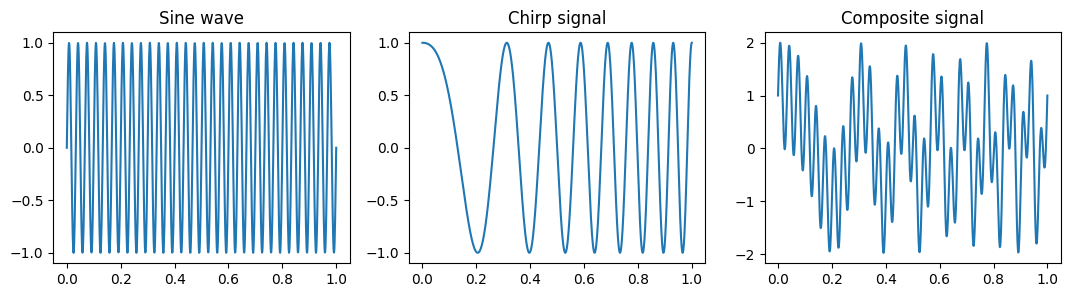

In [61]:
# provided

# Create composite signal
sampling_frequency = 1000
duration = 1
time_vec = np.linspace(0,duration,sampling_frequency * duration) # seconds
frequency = 30 # Hz
sine_wave = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=1, f1=15, t1=1)

composite_signal = chirp_signal+sine_wave

fig, ax = plt.subplots(ncols = 3, figsize = (13,3))
ax[0].plot(time_vec, sine_wave)
ax[0].set_title('Sine wave')
ax[1].plot(time_vec, chirp_signal)
ax[1].set_title('Chirp signal')
ax[2].plot(time_vec, composite_signal)
ax[2].set_title('Composite signal')

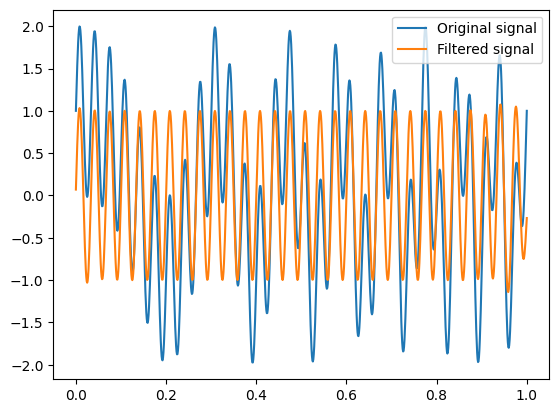

In [ ]:
# solution
filter_order = 5
lowcut = 20 # Hz
highcut = 120 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'band', fs = sampling_frequency)

filtered_signal = signal.filtfilt(b, a,composite_signal)

plt.plot(time_vec, composite_signal, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()

**Exercise**: Apply a bandpass filter a low cutoff at 5 Hz and a high cutoff at 20 Hz to the composite signal below consisting of a chirp signal and a sine wave oscillating at 50 Hz.

What part of the composite signal remains after applying the filter?

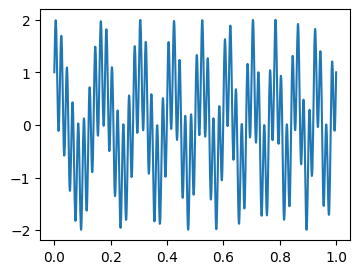

In [49]:
# Create composite signal
sampling_frequency = 1000
duration = 1
time_vec = np.linspace(0,duration,sampling_frequency * duration) # seconds
frequency = 50 # Hz
sine_signal = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=5, f1=15, t1=1)

noise = np.random.normal(loc=0, scale=1,size=len(time_vec))

composite_signal = chirp_signal+sine_signal
plt.figure(figsize=(4,3))
plt.plot(time_vec, composite_signal)

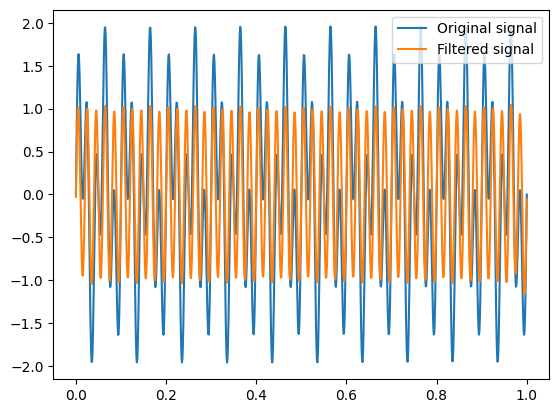

In [ ]:
# solution
filter_order = 5
lowcut = 5 # Hz
highcut = 20 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'band', fs = sampling_frequency)

filtered_signal = signal.filtfilt(b, a,composite_signal)

plt.plot(time_vec, composite_signal, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()


## Section 4

#### Construct and apply bandstop filters to signal


| Code | Description |
| :-- | :-- |
| `b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'bandstop', fs = sampling_frequency)`| Create the coefficients `b` and `a` to be used in the bandstop filtering of the signal. `lowcut` and `highcut` sets the lower and upper cutoff frequencies for the bandpass filter. To create a bandstop filter instead of a bandpass filter, simply set `btype = 'bandstop'`|
| `filtered_signal = signal.filtfilt(b, a, signal))`| Apply the constructed filter to the signal using the coefficients `b` and `a`.|
| `plt.plot(x, y)`                 | Plots the data in `y` against the corresponding values in `x`.|

**Example**: Construct and plot a *bandstop* butterworth filter with a low cutoff at 60 Hz and a high cutoff at 240 Hz.

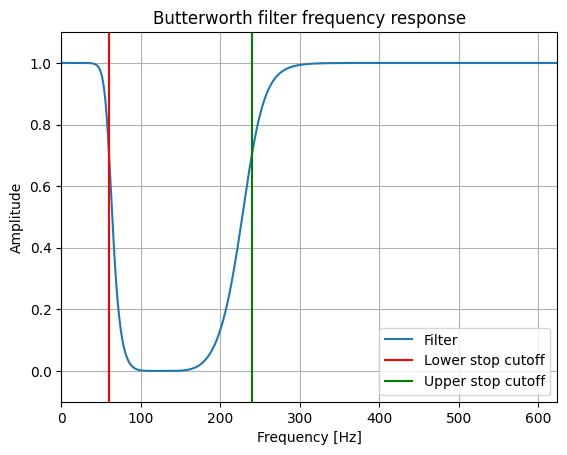

In [51]:
# solution

filter_order = 5
sampling_frequency = 1250 # Hz
lowcut = 60 # Hz
highcut = 240 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'bandstop', fs = sampling_frequency)

w, h = signal.freqz(b, a, fs=sampling_frequency)

plt.plot(w, np.abs(h), label='Filter')
plt.axvline(lowcut, color='red', label='Lower stop cutoff') # cutoff frequency
plt.axvline(highcut, color='green', label='Upper stop cutoff') # cutoff frequency

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and plot a *bandstop* butterworth filter with a low cutoff at 30 Hz and a high cutoff at 50 Hz and a sampling frequency of 200 Hz.

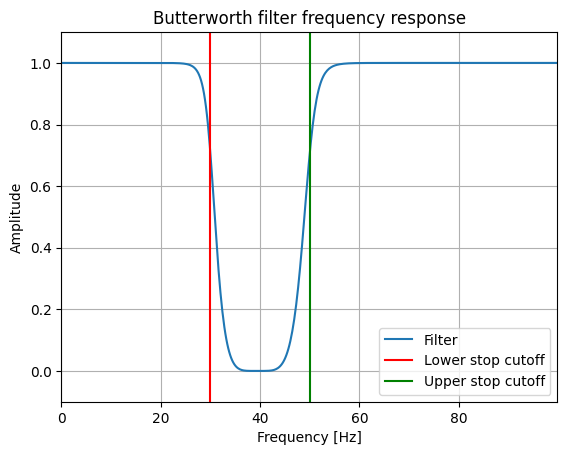

In [52]:
# solution
filter_order = 5
sampling_frequency = 200 # Hz
lowcut = 30 # Hz
highcut = 50 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'bandstop', fs = sampling_frequency)

w, h = signal.freqz(b, a, fs=sampling_frequency)

plt.plot(w, np.abs(h), label='Filter')
plt.axvline(lowcut, color='red', label='Lower stop cutoff') # cutoff frequency
plt.axvline(highcut, color='green', label='Upper stop cutoff') # cutoff frequency

utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

**Exercise**: Construct and apply a bandstop filter to remove the sine wave with the highest frequency from the composite signal below. Plot the original and filtered signals together.

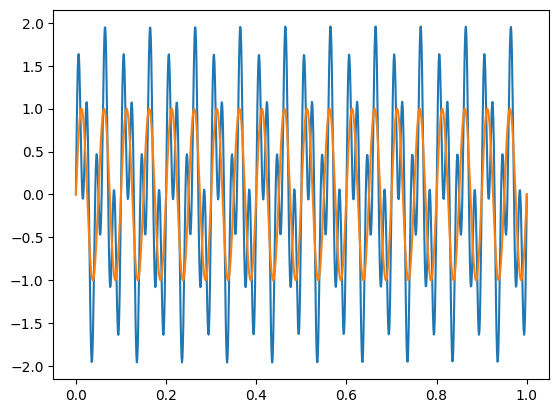

In [77]:
# solution

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequencyA = 20 # Hz
phase = 0
sine_signalA = np.sin(2*np.pi*frequencyA*time_vec+phase)

frequencyB = 50 # Hz
phase = 0
sine_signalB = np.sin(2*np.pi*frequencyB*time_vec+phase)

composite_signal = sine_signalA+sine_signalB
plt.plot(time_vec, composite_signal)
plt.plot(time_vec, sine_signalA)

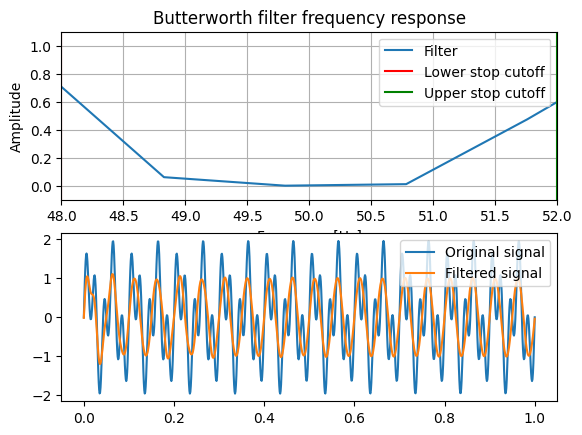

In [83]:
# solution
filter_order = 5
sampling_frequency = 1000 # Hz
lowcut = 48 #49.5 # Hz
highcut = 52 # 50.5 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'bandstop', fs = sampling_frequency)
filtered_signal = signal.filtfilt(b, a,composite_signal)
w, h = signal.freqz(b, a, fs=sampling_frequency)

plt.subplot(2,1,1)
plt.plot(w, np.abs(h), label='Filter')
plt.axvline(lowcut, color='red', label='Lower stop cutoff') # cutoff frequency
plt.axvline(highcut, color='green', label='Upper stop cutoff') # cutoff frequency
plt.xlim([48,52])
utils.style_plot(title='Butterworth filter frequency response', xlabel = 'Frequency [Hz]', ylabel='Amplitude')

plt.subplot(2,1,2)
plt.plot(time_vec, composite_signal, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()


**Exercise**: Construct and apply a bandstop filter to remove the sine wave from the composite signal below such that the filtered signal only contains the chirp signal. Plot original and filtered signals together.

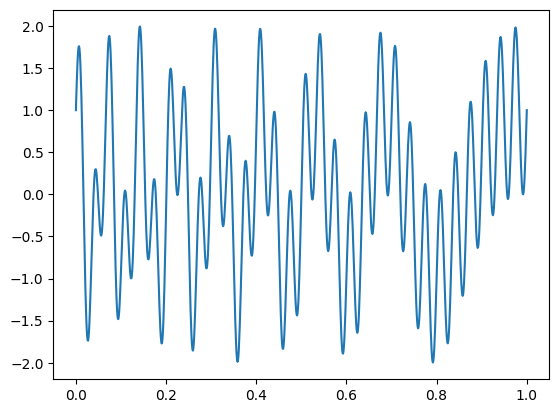

In [84]:
# provided

# Create composite signal
sampling_frequency = 1000
time_vec = np.linspace(0,1,sampling_frequency) # seconds
frequency = 30 # Hz
phase = 0
sine_signal = np.sin(2*np.pi*frequency*time_vec+phase)

chirp_signal = signal.chirp(time_vec, f0=15, f1=1, t1=1)

composite_signal = chirp_signal+sine_signal
plt.plot(time_vec, composite_signal)

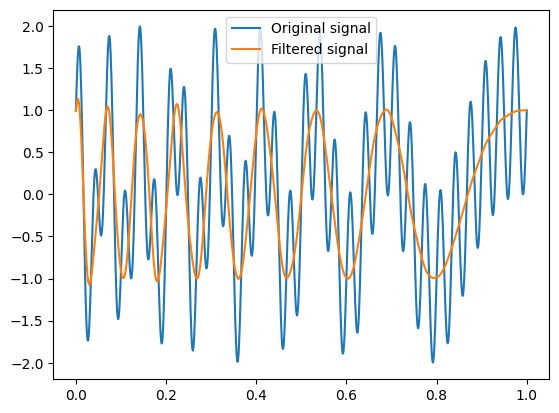

In [85]:
# solution
filter_order = 5
sampling_frequency = 1000 # Hz
lowcut = 28
highcut = 32 # 50.5 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'bandstop', fs = sampling_frequency)
filtered_signal = signal.filtfilt(b, a,composite_signal)

plt.plot(time_vec, composite_signal, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()

**Exercise**: 
Use a **bandpass** filter to **extract** the sine wave from the the same composite signal such that the filtered signal only contains the sine signal. Plot original and filtered signals together.

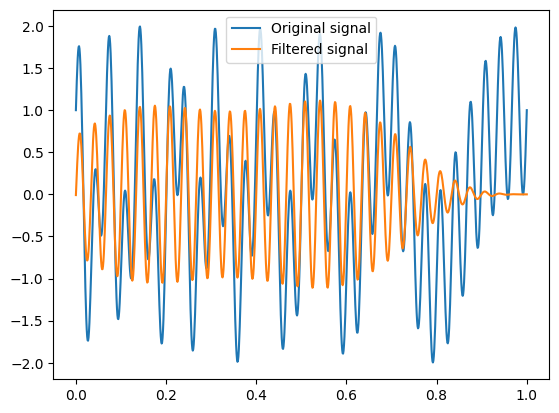

In [86]:
# solution
filter_order = 5
sampling_frequency = 1000 # Hz
lowcut = 28
highcut = 32 # 50.5 # Hz

# creating butter filter
b, a = signal.butter(filter_order, [lowcut, highcut], btype = 'band', fs = sampling_frequency)
filtered_signal = signal.filtfilt(b, a,composite_signal)

plt.plot(time_vec, composite_signal, label = 'Original signal')
plt.plot(time_vec, filtered_signal, label = 'Filtered signal')
plt.legend()